# Fitting 1-D model to averaged data (N = 8)

In [25]:
import sys
sys.path.append('../../')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import itertools
import nibabel as nib
import numpy as np
import pandas as pd
import h5py
import itertools
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import figure
import binning_eccen
import pytorch_1D_model_fitting as fitting
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's load (or make) averaged data across subjects.

In [2]:
avg_subj_df = binning_eccen.get_all_subj_df(subj_list=np.arange(1, 9), central_tendency=["mean"], dv_to_group=["vroinames", "eccrois", "freq_lvl"])

In [5]:
avg_subj_df.head()

,vroinames,eccrois,freq_lvl,beta,local_ori,local_sf,subj
0,V1,1.0,0,1.308302,1.572508,2.545116,avg
1,V1,1.0,1,0.976649,1.572508,4.563121,avg
2,V1,1.0,2,1.331440,1.572508,8.689569,avg
3,V1,1.0,3,0.831325,1.570419,16.081422,avg
4,V1,1.0,4,0.852582,1.572508,30.195154,avg


Let's check if the shape is right. The total length of the dataframe should be (num. of subjects) X (num. of visual ROIs) X (num. of eccentricity bins) X (num. of frequency level). The number of eccentricity bins is currently 5 and we have 6 different frequency levels. So, the number of rows should be 1 X 4 X 5 X 6 = 120.

In [6]:
print(avg_subj_df.shape[0])

120


Now we can fit the 1D model for each visual ROI and for each eccentricity bin. Our goal is to find optimized values of amplitude, mode (highest peak), and sigma of the log pdf function. I first set all initial values of the parameters as 1, but it seems that sigma tends to get bigger than 1. My learning rate was set as 0.05, but it seems that I will need to find a way to optimize this learning rate for each subject, because for some subjects this learning rate returned NaN values for the parameters that I want to optimize.

In [18]:
output_df = fitting.pytorch_1D_model_fitting(input_df=avg_subj_df, subj_list=None, initial_val = [1, 1, 1], epoch=5000, alpha=0.05)

epoch 0 loss 0.893
epoch 500 loss 0.023
epoch 1000 loss 0.022
epoch 1500 loss 0.022
epoch 2000 loss 0.022
epoch 2500 loss 0.021
epoch 3000 loss 0.021
epoch 3500 loss 0.021
epoch 4000 loss 0.021
epoch 4500 loss 0.021
*** avg V1 ecc 1.0 finished ***
amplitude 1.37, mode 0.36, sigma 7

epoch 0 loss 2.355
epoch 500 loss 0.083
epoch 1000 loss 0.077
epoch 1500 loss 0.075
epoch 2000 loss 0.074
epoch 2500 loss 0.074
epoch 3000 loss 0.073
epoch 3500 loss 0.074
epoch 4000 loss 0.074
epoch 4500 loss 0.073
*** avg V1 ecc 2.0 finished ***
amplitude 2.53, mode 0.05, sigma 8

epoch 0 loss 3.234
epoch 500 loss 0.098
epoch 1000 loss 0.092
epoch 1500 loss 0.09
epoch 2000 loss 0.089
epoch 2500 loss 0.088
epoch 3000 loss 0.088
epoch 3500 loss 0.088
epoch 4000 loss 0.104
epoch 4500 loss 0.088
*** avg V1 ecc 3.0 finished ***
amplitude 2.87, mode 0.04, sigma 8

epoch 0 loss 3.93
epoch 500 loss 0.114
epoch 1000 loss 0.108
epoch 1500 loss 0.106
epoch 2000 loss 0.105
epoch 2500 loss 0.104
epoch 3000 loss 0.104


Let's see the output dataframe. The way I organized the output was adding another three columns of amplitude, mode, sigma for each combination of subj & visual ROI & and eccentricity bin.

In [20]:
output_df

,subj,vroinames,cur_ecc,amp,mode,sigma
0,avg,V1,1.0,1.368154,0.362374,6.584728
1,avg,V1,2.0,2.534110,0.047778,8.265770
2,avg,V1,3.0,2.869061,0.042327,8.239155
3,avg,V1,4.0,2.828962,0.064724,8.128732
4,avg,V1,5.0,2.130961,0.206777,6.177921
5,avg,V2,1.0,1.575850,0.517135,5.588701
6,avg,V2,2.0,1.898502,1.015922,5.139386
7,avg,V2,3.0,2.188846,0.567418,5.134456
8,avg,V2,4.0,2.153871,0.033932,8.293842
9,avg,V2,5.0,1.446384,0.111875,6.942239


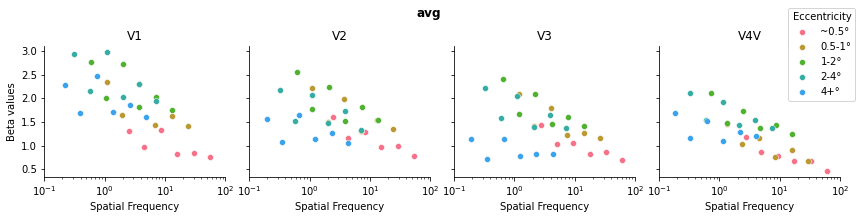

In [19]:
grid = binning_eccen.plot_2D(mean_df=avg_subj_df, subj='avg', save_fig=False)

This part of code will look a lot messy, because I'm still trying to figure out how I should organize my output and how I can plot the datapoints and log normal pdf functions together using seaborn package. But for now I just wanted to check if I found right peak (mode) for each eccentricity bin, so I just made a long messy snippet of code for plotting all of them.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

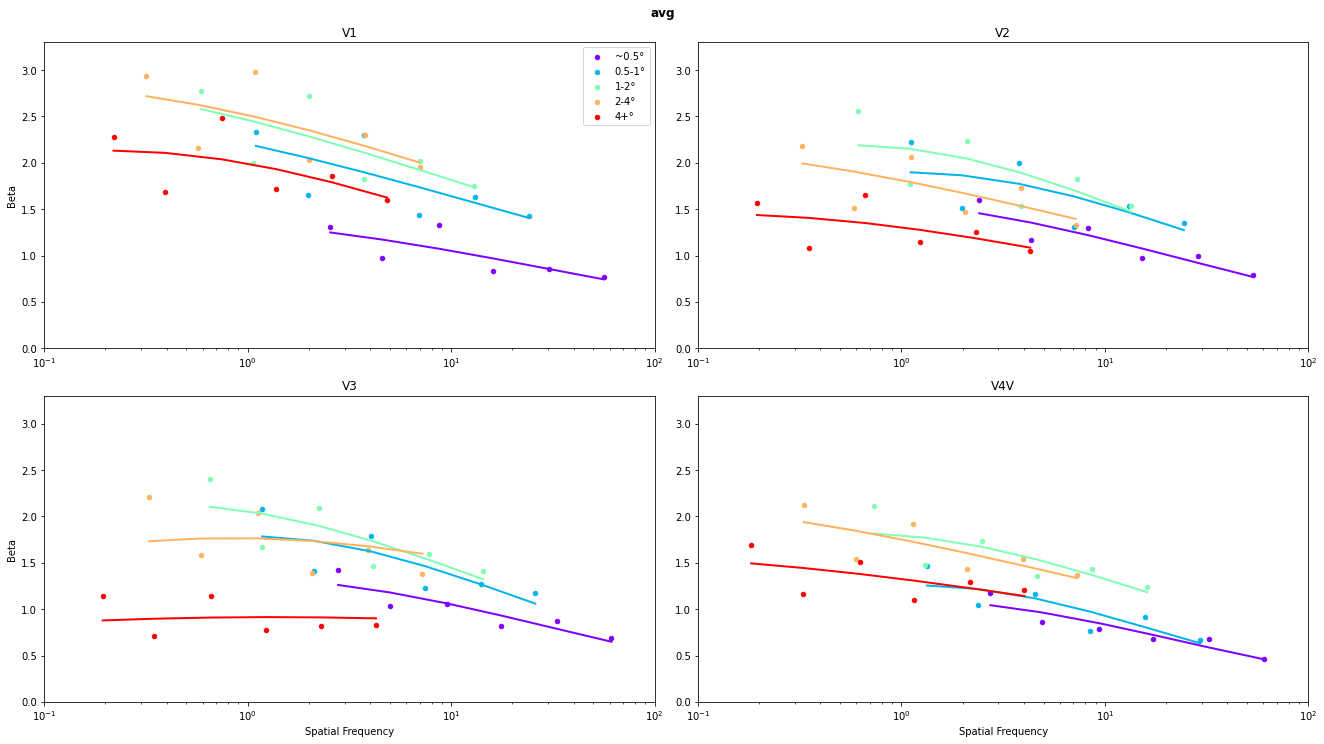

In [27]:
subj_list=['avg']
labels=['~0.5°', '0.5-1°', '1-2°', '2-4°', '4+°']
label_nums = np.linspace(0,1,len(labels))
color = plt.cm.rainbow(label_nums)
for sn in subj_list:

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(sn, fontweight="bold")
    axes = fig.subplots(nrows=2, ncols = 2)
    vroi_list = output_df.vroinames.unique()
    eccrois_list = output_df.cur_ecc.unique()
    for cur_roi, cur_ecc in itertools.product(vroi_list, eccrois_list):
        if cur_roi == 'V1':
            cur_row = 0
            cur_col = 0
        elif cur_roi == 'V2':
            cur_row = 0
            cur_col = 1
        elif cur_roi == 'V3':
            cur_row = 1
            cur_col = 0
        elif cur_roi == 'V4v':
            cur_row = 1
            cur_col = 1
        cur_idx = cur_row * 2 + cur_col
        if cur_row == 1:
            axes[cur_row, cur_col].set_xlabel("Spatial Frequency")
        if cur_col == 0:
            axes[cur_row, cur_col].set_ylabel("Beta")

        cur_dot_df = avg_subj_df.query('(subj == @sn) & (vroinames == @cur_roi) & (eccrois == @cur_ecc)')
        cur_line_df = output_df.query('(subj == @sn) & (vroinames == @cur_roi) & (cur_ecc == @cur_ecc)')
        x = cur_dot_df.local_sf
        y = cur_dot_df.beta
        y_pdf = fitting.np_log_norm_pdf(x.values, cur_line_df.amp.item(), cur_line_df['mode'].item(), cur_line_df.sigma.item())
        axes[cur_row, cur_col].scatter(x, y, s=20, c=color[int(cur_ecc-1),:], label=labels[int(cur_ecc-1)])
        axes[cur_row, cur_col].plot(x, y_pdf, linewidth=2, color=color[int(cur_ecc-1),:])
        axes[cur_row, cur_col].set_title(f'{cur_roi.title()}')
        axes[cur_row, cur_col].set_xlim([10**-1, 10**2])
        axes[cur_row, cur_col].set_xscale('log')
        axes[cur_row, cur_col].set_ylim([0, 3.3])
        if cur_idx == 0:
            axes[cur_row, cur_col].legend(loc="upper right")

    plt.tight_layout()
    plt.show()
    plt.xscale('log')
    plt.close()